In [1]:
# Use Erdos_Spring_2025 conda env as created
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [52]:
# path to the dataset
file_path = "Dry_Eye_Dataset.csv"

# Load the latest version of the file
df0 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dakshnagra/dry-eye-disease",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73635/3521891120.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df0 = kagglehub.load_dataset(


In [27]:
#Import some packages for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#Print Headers of first five entries
df0.head(5)

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N   

  Medical issue Ongoing medication Smart device before bed  \
0             Y                  Y                       N   
1             Y                  Y                       N   
2             N                  N                       Y   
3             Y                  N                       N   
4             Y                  N                       N   

  Average screen time Blue-light filter Discomfort Eye-strain Redness in eye  \
0                 8.7                 N                     Y              Y   
1                 9.6                 Y                     N              N   
2                 4.0                 N                     Y              N   
3                 7.6                 N                     Y              N   
4                 3.5                 N                     Y              Y   

  Itchiness/Irritation in eye Dry Eye Disease  
0                           N               Y  
1                           Y               Y  
2                           N               N  
3                           Y               N  
4                           N               Y  

[5 rows x 26 columns]

In [54]:
# Print the info of the datasets
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

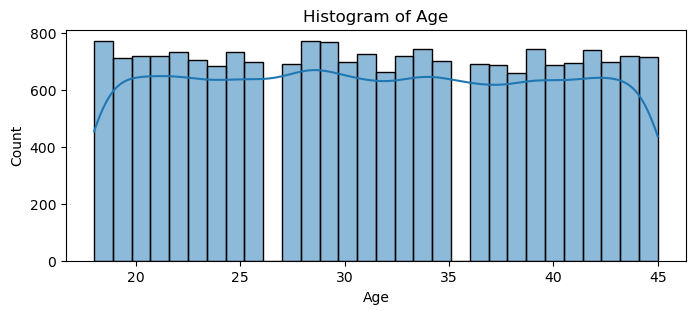

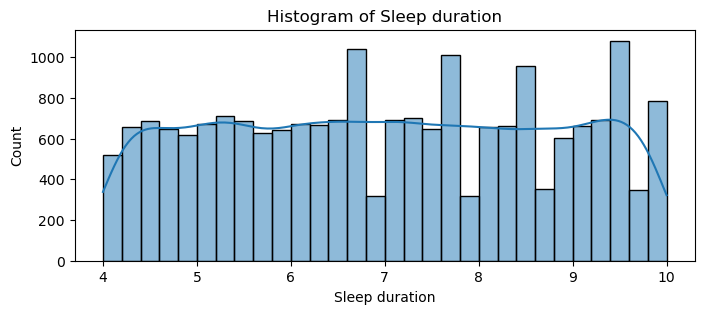

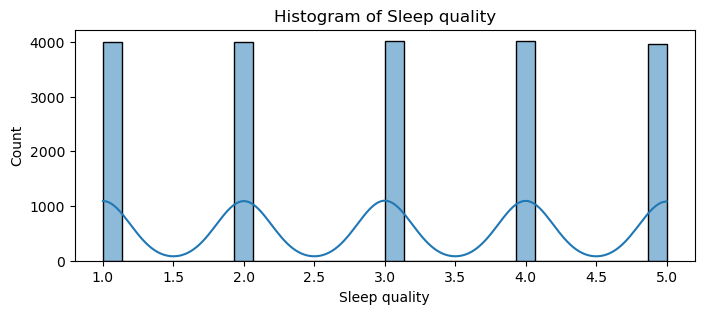

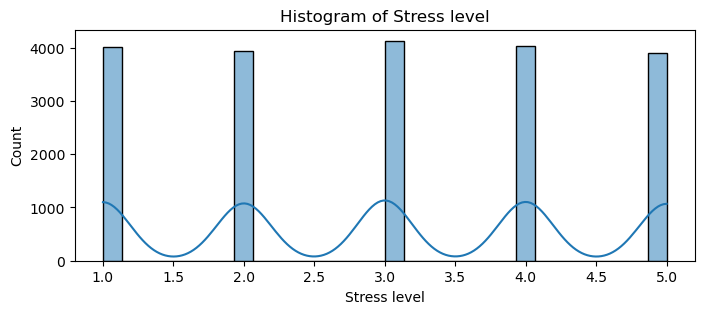

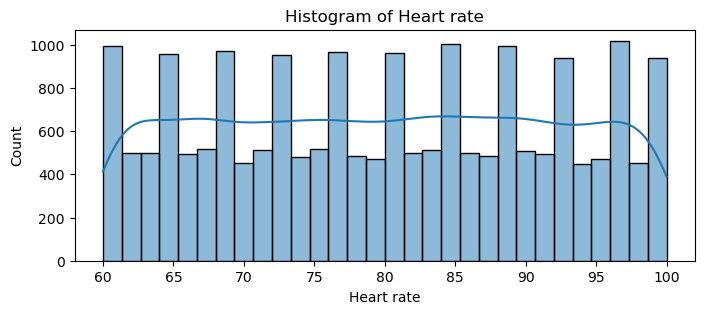

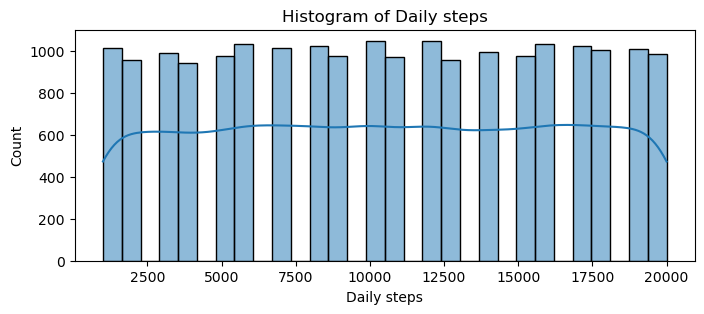

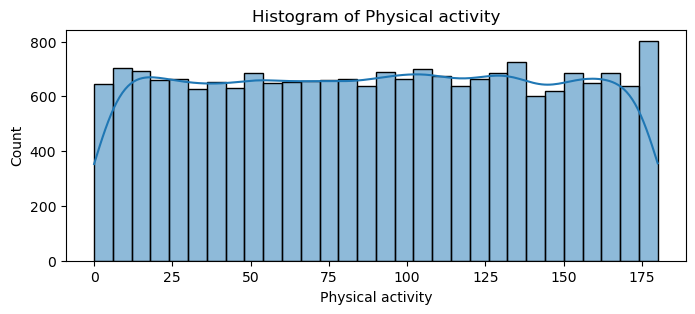

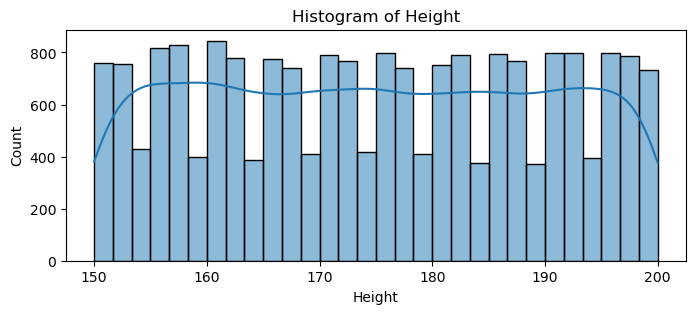

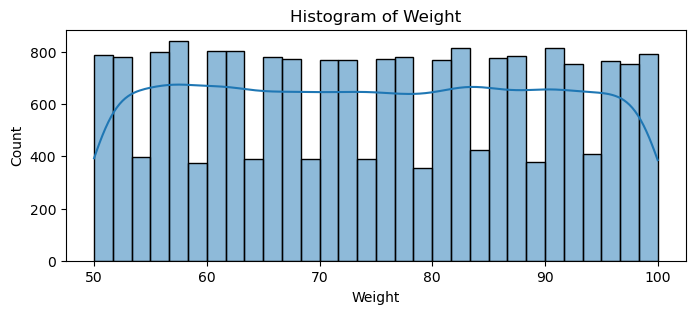

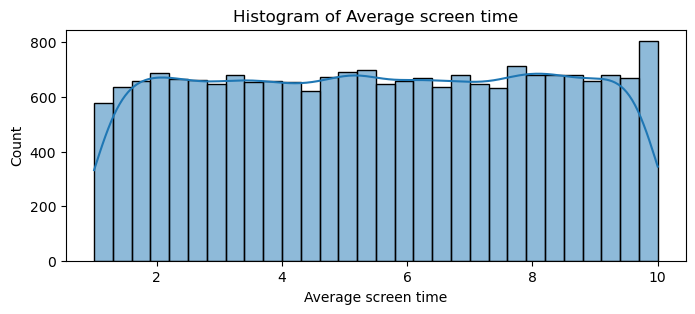

In [55]:
#Plot histograms of numerical quantities
numerical_col=df0.select_dtypes(include="number")
for col in numerical_col.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data=numerical_col[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

In [58]:
df = df0
#Make everything lower case, and replace space with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Replace 'M' with 1 and 'F' with 0
df['gender'] = df['gender'].replace({'M': 0.5, 'F': -0.5})

# Split the blood_pressure column into two new columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)

# Define the Blood Pressure Category
def categorize_bp(row):
    if 110 <= int(row['systolic']) <= 120 and 70 <= int(row['diastolic']) <= 80:
        return 'normal'
    elif int(row['systolic']) > 120 or int(row['diastolic']) > 80:
        return 'high'
    else:
        return 'low'
# Apply the function to create a new category column
df['bp_category'] = df.apply(categorize_bp, axis=1)

# Select only columns that contain 'Y' and 'N'
columns_to_replace = df.columns[df.isin(['Y', 'N']).all()]

# Replace 'Y' with 1 and 'N' with 0 in those columns
df[columns_to_replace] = df[columns_to_replace].replace({'Y': 1, 'N': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       20000 non-null  float64
 1   age                          20000 non-null  int64  
 2   sleep_duration               20000 non-null  float64
 3   sleep_quality                20000 non-null  int64  
 4   stress_level                 20000 non-null  int64  
 5   blood_pressure               20000 non-null  object 
 6   heart_rate                   20000 non-null  int64  
 7   daily_steps                  20000 non-null  int64  
 8   physical_activity            20000 non-null  int64  
 9   height                       20000 non-null  int64  
 10  weight                       20000 non-null  int64  
 11  sleep_disorder               20000 non-null  int64  
 12  wake_up_during_night         20000 non-null  int64  
 13  feel_sleepy_duri

In [59]:
df[['systolic', 'diastolic', 'bp_category']]

systolic diastolic bp_category
0          137        89        high
1          108        64         low
2          134        81        high
3          110        90        high
4           99        67         low
...        ...       ...         ...
19995      132        64        high
19996      101        75         low
19997      124        63        high
19998      136        70        high
19999       96        90        high

[20000 rows x 3 columns]

In [51]:
df.describe()

gender           age  sleep_duration  sleep_quality  \
count  20000.000000  20000.000000    20000.000000   20000.000000   
mean       0.001400     31.422800        6.998245       2.997250   
std        0.500011      8.103717        1.731723       1.412283   
min       -0.500000     18.000000        4.000000       1.000000   
25%       -0.500000     24.000000        5.500000       2.000000   
50%        0.500000     31.000000        7.000000       3.000000   
75%        0.500000     39.000000        8.500000       4.000000   
max        0.500000     45.000000       10.000000       5.000000   

       stress_level    heart_rate   daily_steps  physical_activity  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean       2.993750     79.912200  10536.900000          90.069750   
std        1.407235     11.808279   5752.729186          52.317283   
min        1.000000     60.000000   1000.000000           0.000000   
25%        2.000000     70.000000   6000.000000          45.000000   
50%        3.000000     80.000000  11000.000000          91.000000   
75%        4.000000     90.000000  16000.000000         135.000000   
max        5.000000    100.000000  20000.000000         180.000000   

             height        weight  ...       smoking  medical_issue  \
count  20000.000000  20000.000000  ...  20000.000000   20000.000000   
mean     174.865900     74.891850  ...      0.499150       0.494450   
std       14.719903     14.733839  ...      0.500012       0.499982   
min      150.000000     50.000000  ...      0.000000       0.000000   
25%      162.000000     62.000000  ...      0.000000       0.000000   
50%      175.000000     75.000000  ...      0.000000       0.000000   
75%      188.000000     88.000000  ...      1.000000       1.000000   
max      200.000000    100.000000  ...      1.000000       1.000000   

       ongoing_medication  smart_device_before_bed  average_screen_time  \
count        20000.000000             20000.000000         20000.000000   
mean             0.504100                 0.500150             5.519885   
std              0.499996                 0.500012             2.606305   
min              0.000000                 0.000000             1.000000   
25%              0.000000                 0.000000             3.300000   
50%              1.000000                 1.000000             5.500000   
75%              1.000000                 1.000000             7.800000   
max              1.000000                 1.000000            10.000000   

       blue-light_filter  discomfort_eye-strain  redness_in_eye  \
count       20000.000000           20000.000000    20000.000000   
mean            0.499200               0.501850        0.493550   
std             0.500012               0.500009        0.499971   
min             0.000000               0.000000        0.000000   
25%             0.000000               0.000000        0.000000   
50%             0.000000               1.000000        0.000000   
75%             1.000000               1.000000        1.000000   
max             1.000000               1.000000        1.000000   

       itchiness/irritation_in_eye  dry_eye_disease  
count                 20000.000000     20000.000000  
mean                      0.496850         0.651850  
std                       0.500003         0.476396  
min                       0.000000         0.000000  
25%                       0.000000         0.000000  
50%                       0.000000         1.000000  
75%                       1.000000         1.000000  
max                       1.000000         1.000000  

[8 rows x 25 columns]

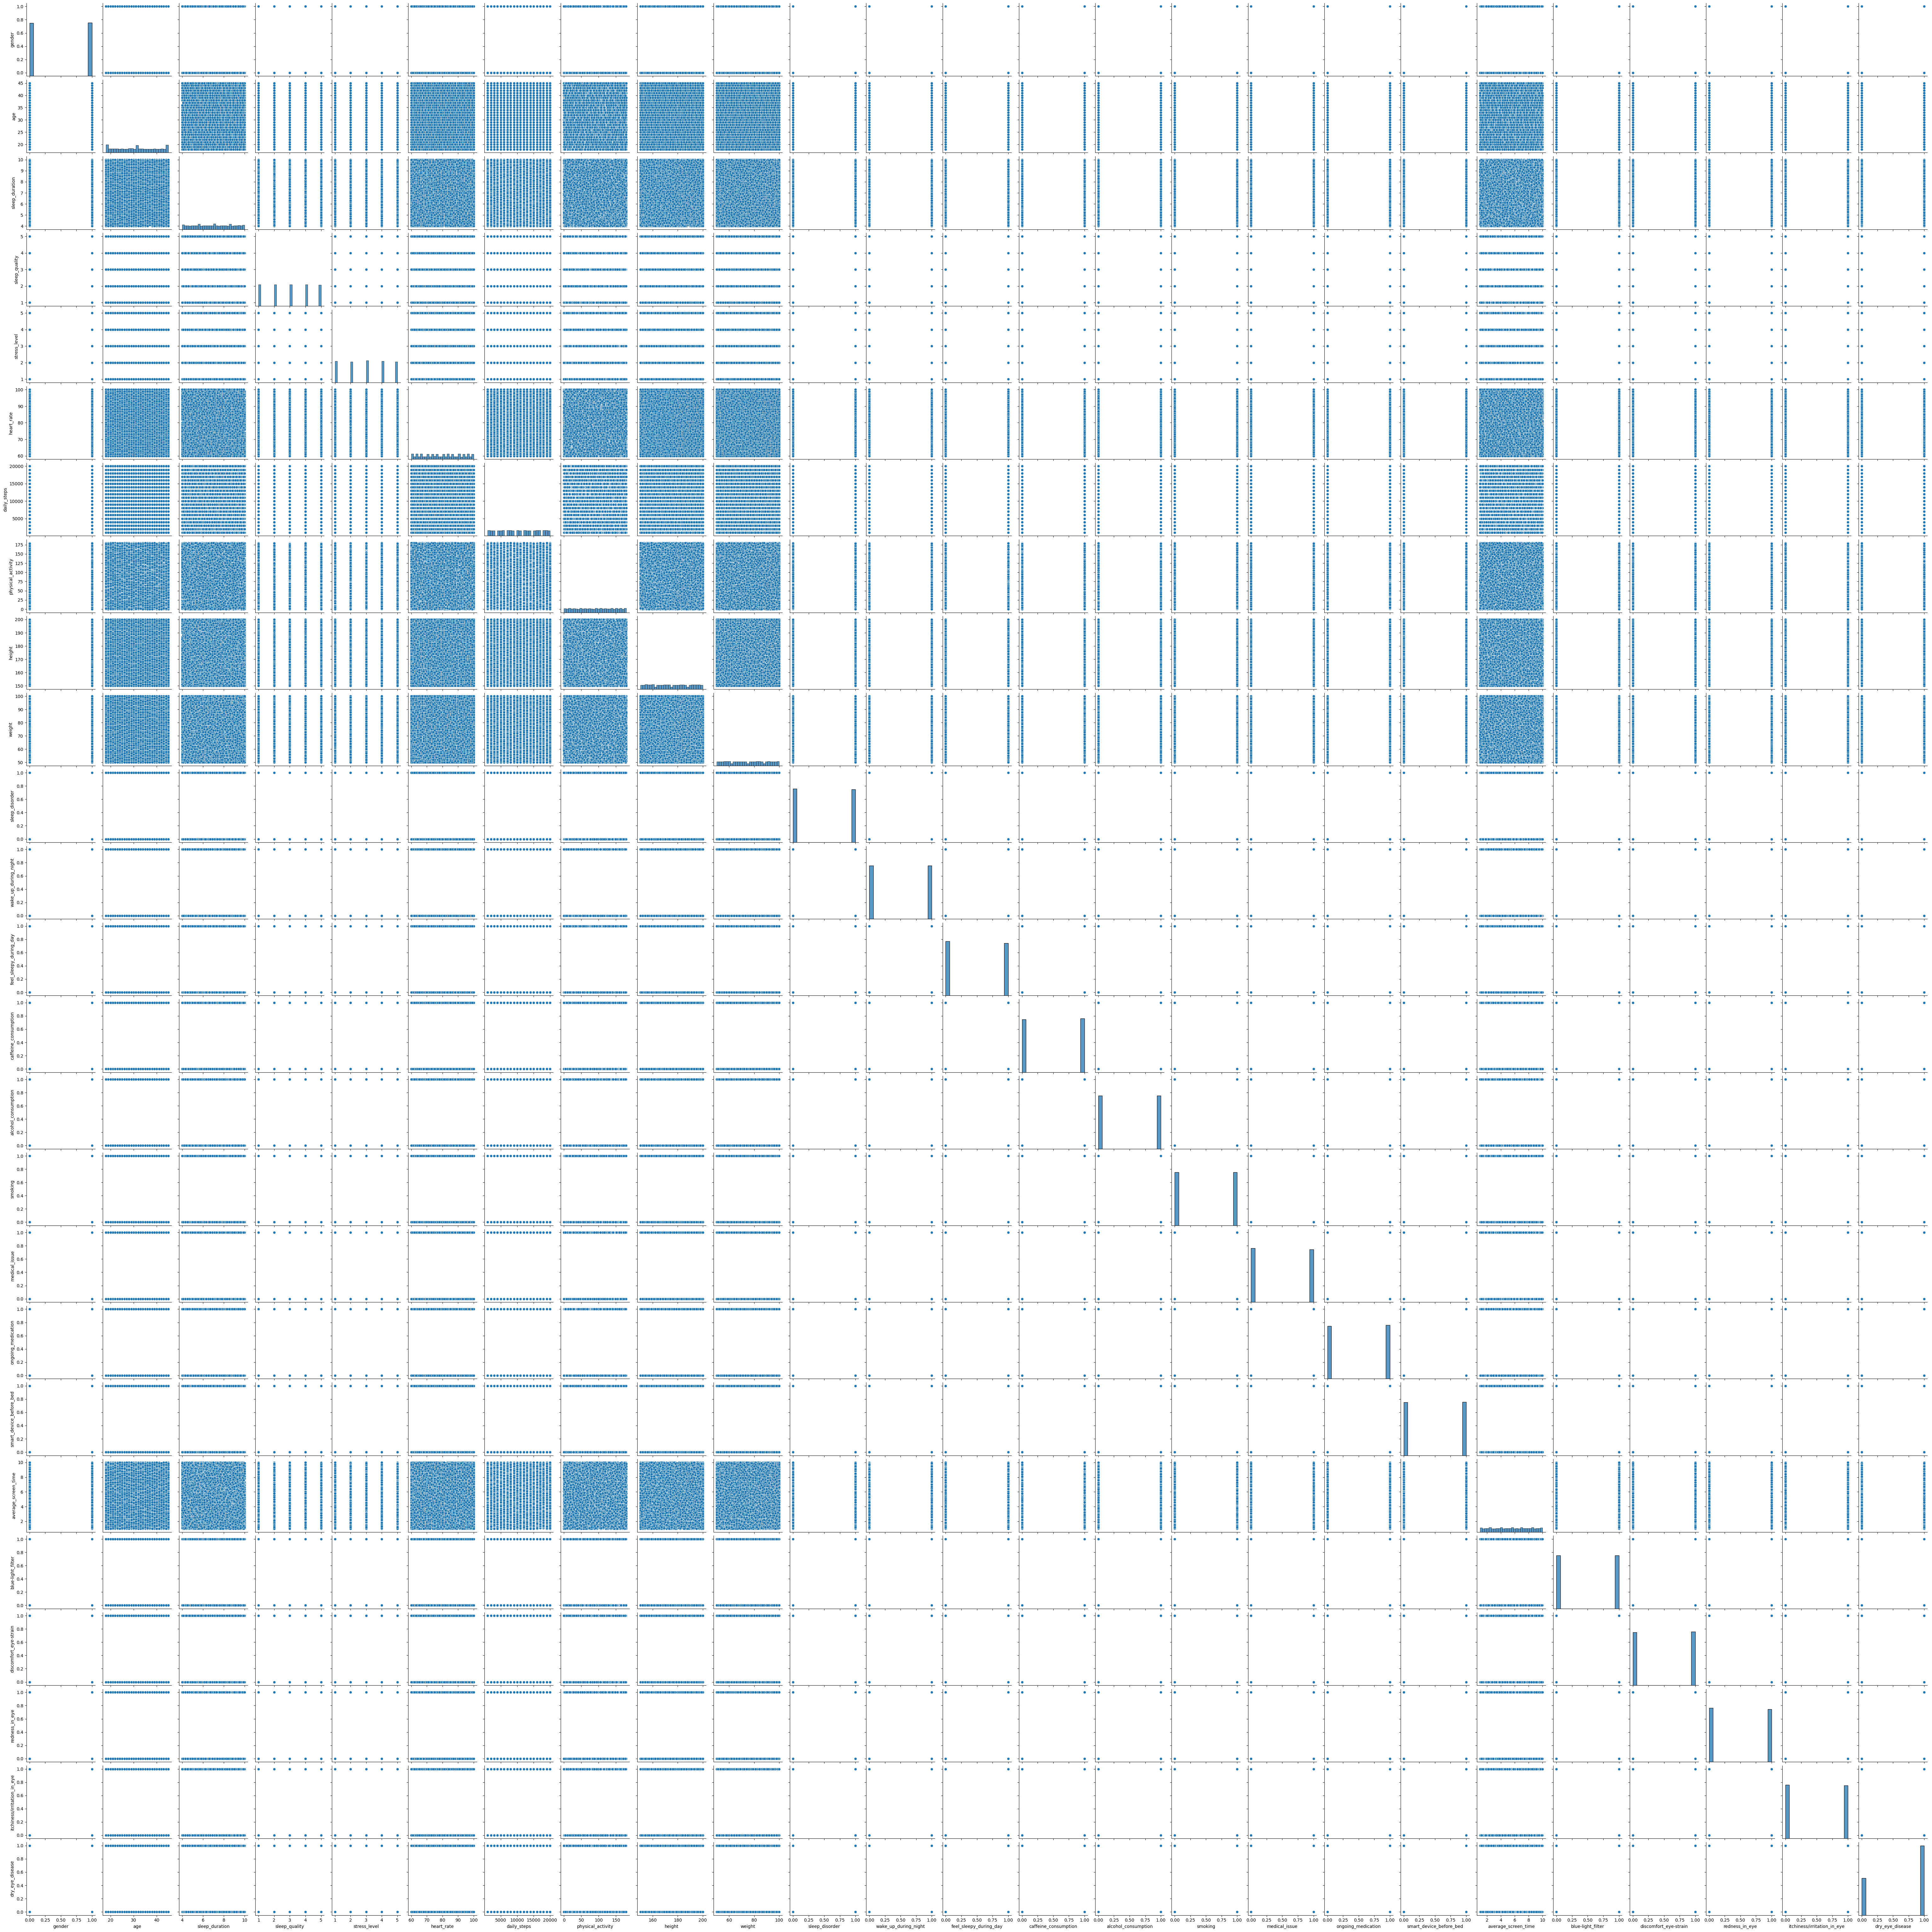

In [32]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])
sns.pairplot(df_numeric)
plt.show()

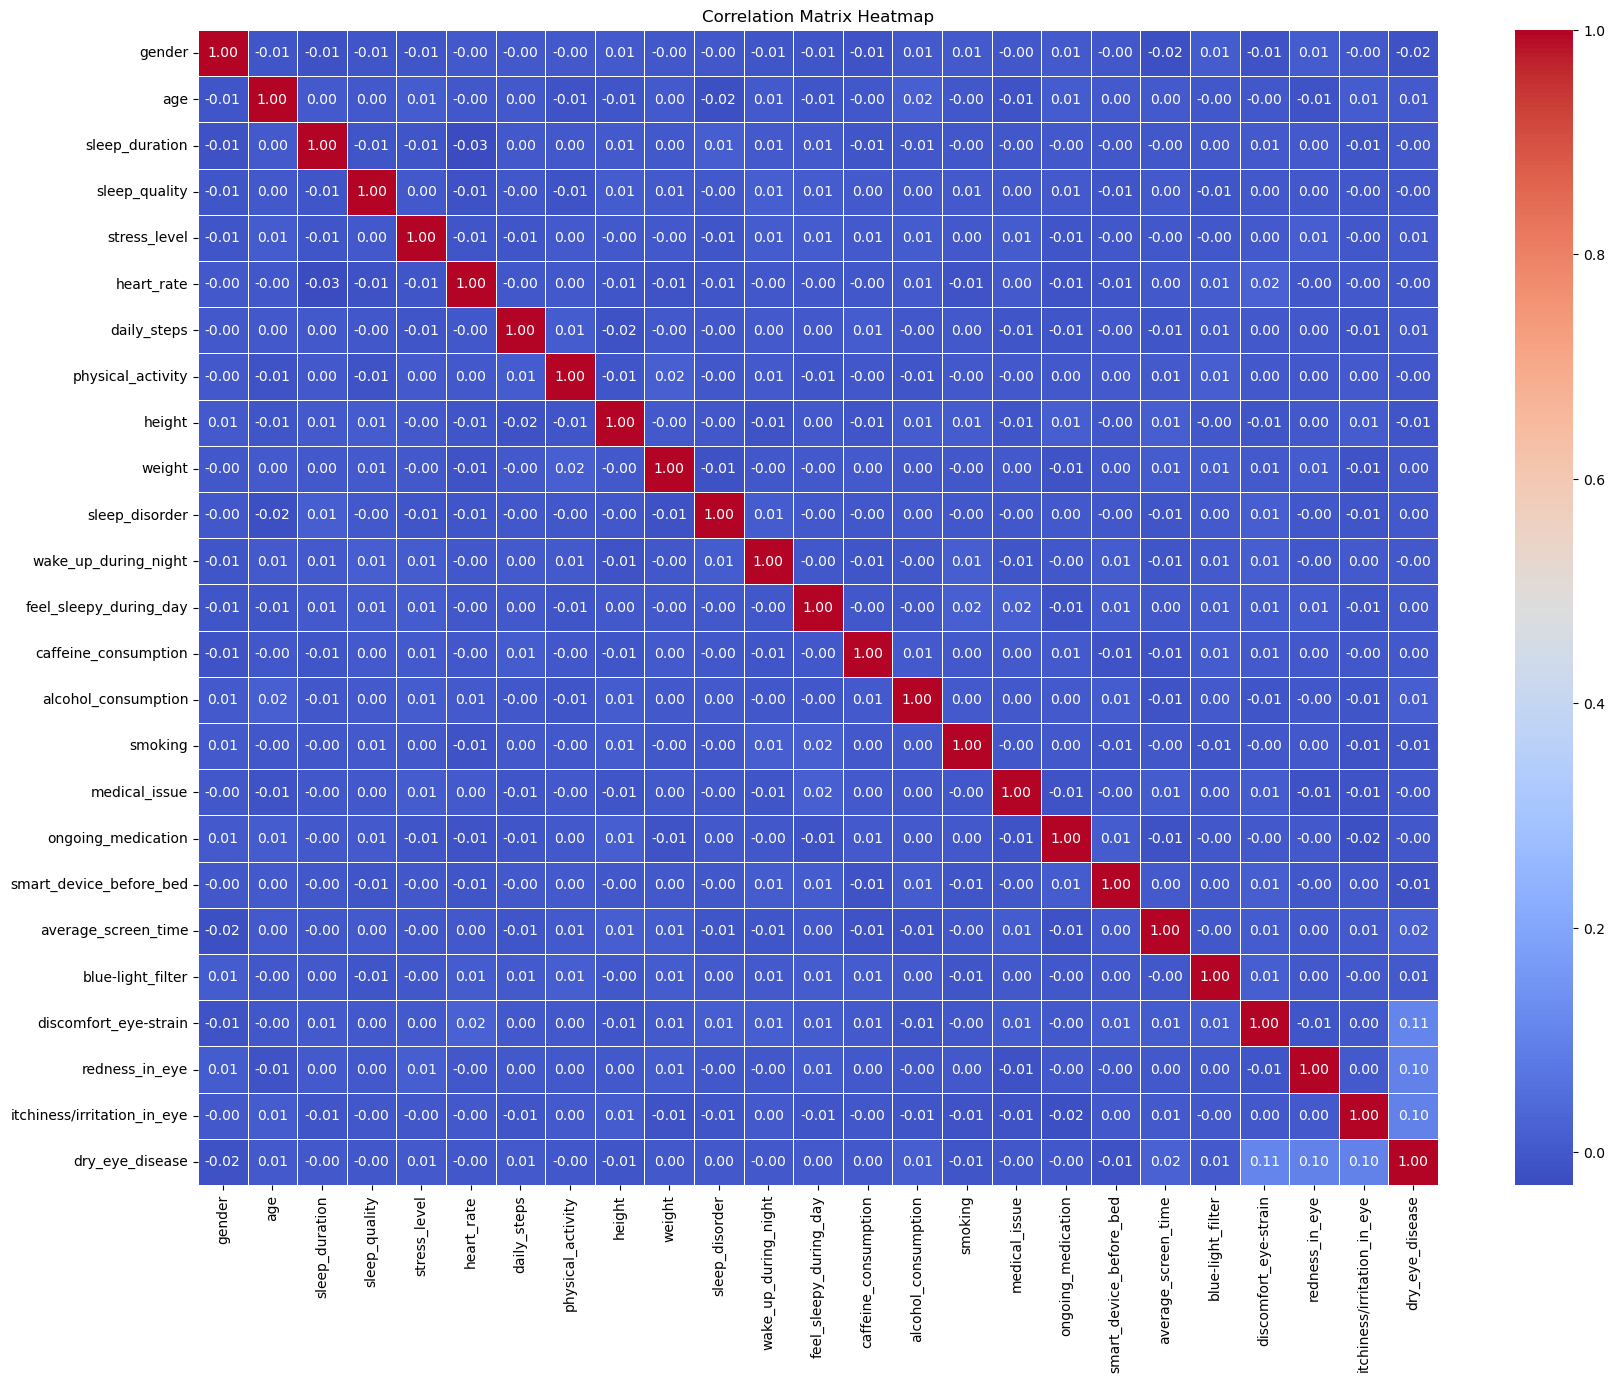

In [86]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

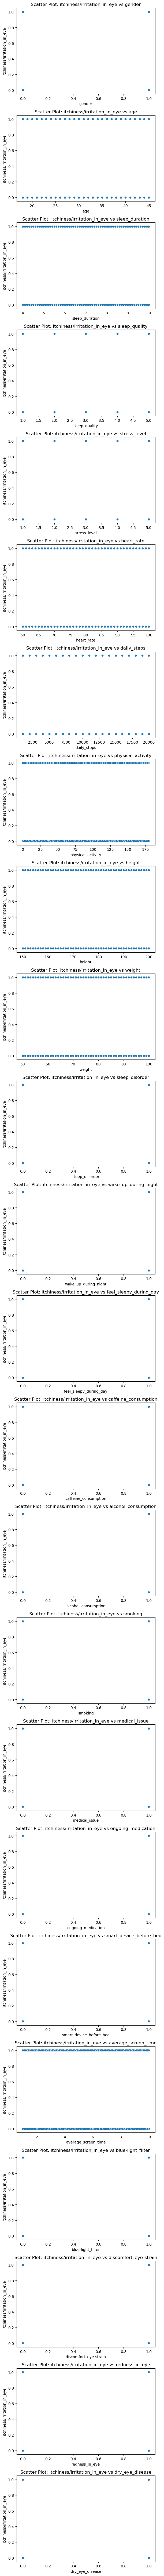

In [37]:
# Choose a target column to compare against all others
target_col = 'itchiness/irritation_in_eye'
# Select all numerical columns except the target
other_cols = df.select_dtypes(include=['number']).columns.drop(target_col)
# Create scatter plots
fig, axes = plt.subplots(nrows=len(other_cols), figsize=(6, 4 * len(other_cols)))
# Ensure axes is always iterable (even if there's only one subplot)
if len(other_cols) == 1:
    axes = [axes]
for ax, col in zip(axes, other_cols):
    sns.scatterplot(data=df, x=col, y=target_col, ax=ax)
    ax.set_title(f'Scatter Plot: {target_col} vs {col}')

plt.tight_layout()
plt.show()

In [70]:
corr_matrix0 = df.select_dtypes(include=['number']).corr()
corr_matrix0

gender       age  sleep_duration  \
gender                       1.000000 -0.007612       -0.014073   
age                         -0.007612  1.000000        0.004857   
sleep_duration              -0.014073  0.004857        1.000000   
sleep_quality               -0.005695  0.002513       -0.006892   
stress_level                -0.006703  0.008379       -0.006088   
heart_rate                  -0.000208 -0.001196       -0.029175   
daily_steps                 -0.000505  0.001302        0.002823   
physical_activity           -0.000253 -0.009191        0.001858   
height                       0.006942 -0.005171        0.005259   
weight                      -0.001585  0.003908        0.000222   
sleep_disorder              -0.003881 -0.017633        0.013278   
wake_up_during_night        -0.006800  0.005208        0.005720   
feel_sleepy_during_day      -0.006751 -0.007254        0.005270   
caffeine_consumption        -0.009325 -0.001205       -0.008350   
alcohol_consumption          0.005498  0.018994       -0.005020   
smoking                      0.005905 -0.003293       -0.003637   
medical_issue               -0.001269 -0.010528       -0.001804   
ongoing_medication           0.005377  0.007507       -0.000208   
smart_device_before_bed     -0.001701  0.003810       -0.003081   
average_screen_time         -0.018310  0.003177       -0.004208   
blue-light_filter            0.009805 -0.002508        0.002034   
discomfort_eye-strain       -0.010110 -0.001069        0.006544   
redness_in_eye               0.007337 -0.010335        0.004315   
itchiness/irritation_in_eye -0.000282  0.009893       -0.007170   
dry_eye_disease             -0.016321  0.005258       -0.000874   

                             sleep_quality  stress_level  heart_rate  \
gender                           -0.005695     -0.006703   -0.000208   
age                               0.002513      0.008379   -0.001196   
sleep_duration                   -0.006892     -0.006088   -0.029175   
sleep_quality                     1.000000      0.000721   -0.014326   
stress_level                      0.000721      1.000000   -0.008332   
heart_rate                       -0.014326     -0.008332    1.000000   
daily_steps                      -0.003074     -0.005978   -0.001899   
physical_activity                -0.010329      0.004272    0.001334   
height                            0.009380     -0.000651   -0.005229   
weight                            0.005604     -0.000611   -0.009639   
sleep_disorder                   -0.000474     -0.005467   -0.005683   
wake_up_during_night              0.011436      0.007568   -0.001702   
feel_sleepy_during_day            0.008145      0.007561   -0.002301   
caffeine_consumption              0.003947      0.006542   -0.003982   
alcohol_consumption               0.003578      0.007714    0.005664   
smoking                           0.006971      0.001165   -0.010954   
medical_issue                     0.000297      0.010931    0.003898   
ongoing_medication                0.005858     -0.008172   -0.012871   
smart_device_before_bed          -0.005133     -0.002450   -0.007891   
average_screen_time               0.004697     -0.001344    0.002467   
blue-light_filter                -0.007969     -0.002317    0.008719   
discomfort_eye-strain             0.001459      0.003889    0.019235   
redness_in_eye                    0.002843      0.011989   -0.004331   
itchiness/irritation_in_eye      -0.002597     -0.004114   -0.000182   
dry_eye_disease                  -0.004990      0.005481   -0.002083   

                             daily_steps  physical_activity    height  \
gender                         -0.000505          -0.000253  0.006942   
age                             0.001302          -0.009191 -0.005171   
sleep_duration                  0.002823           0.001858  0.005259   
sleep_quality                  -0.003074          -0.010329  0.009380   
stress_level                   -0.005978          

24


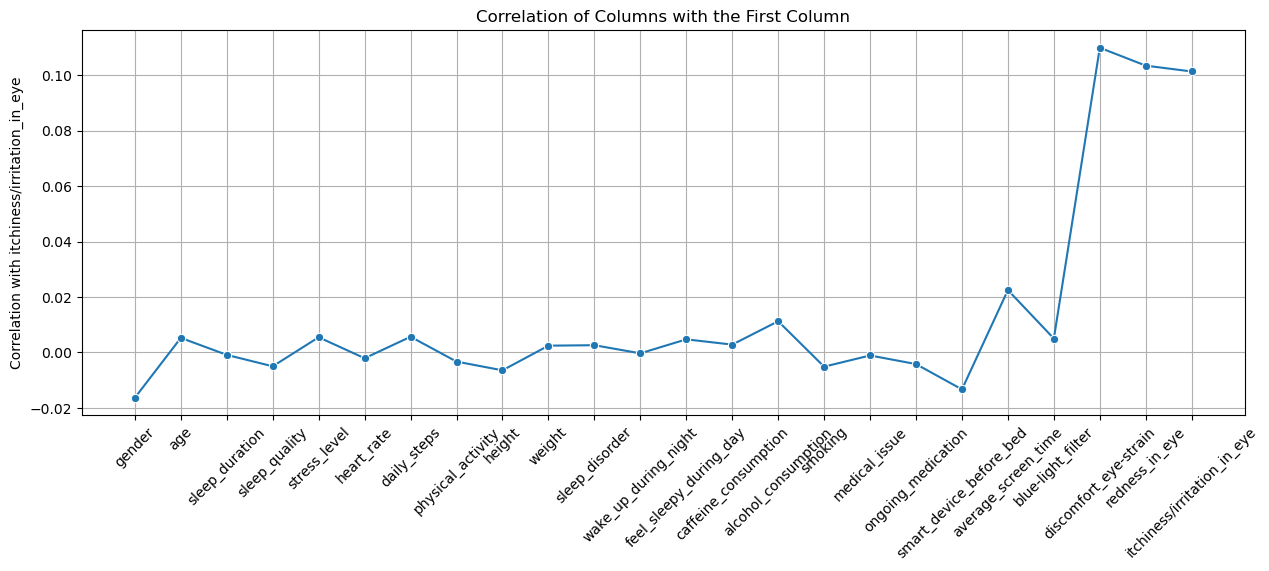

23


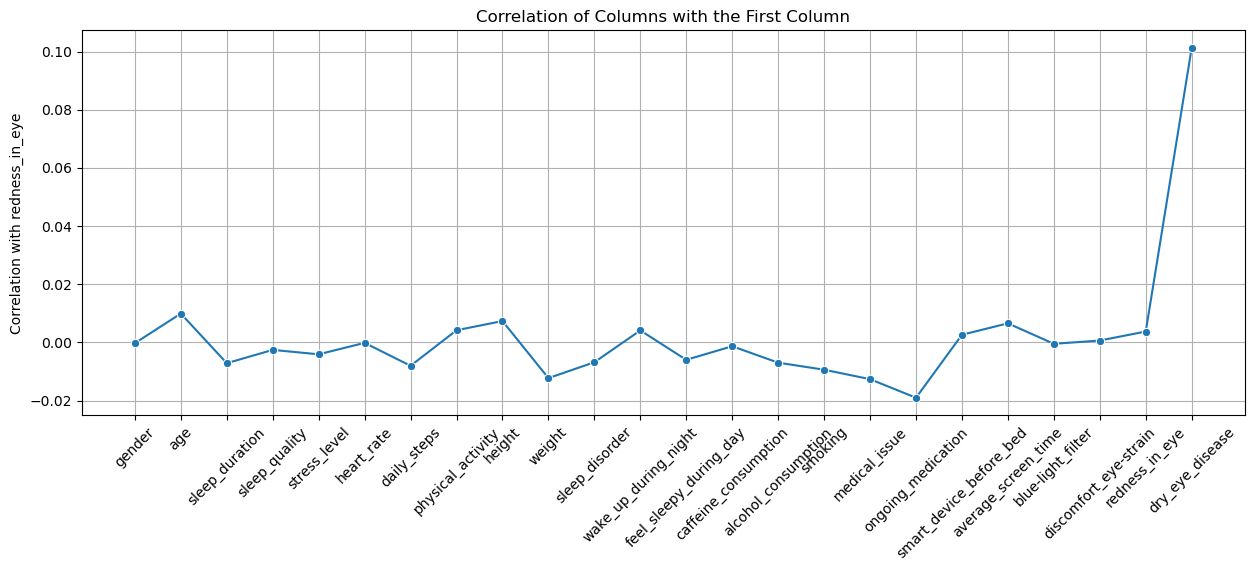

22


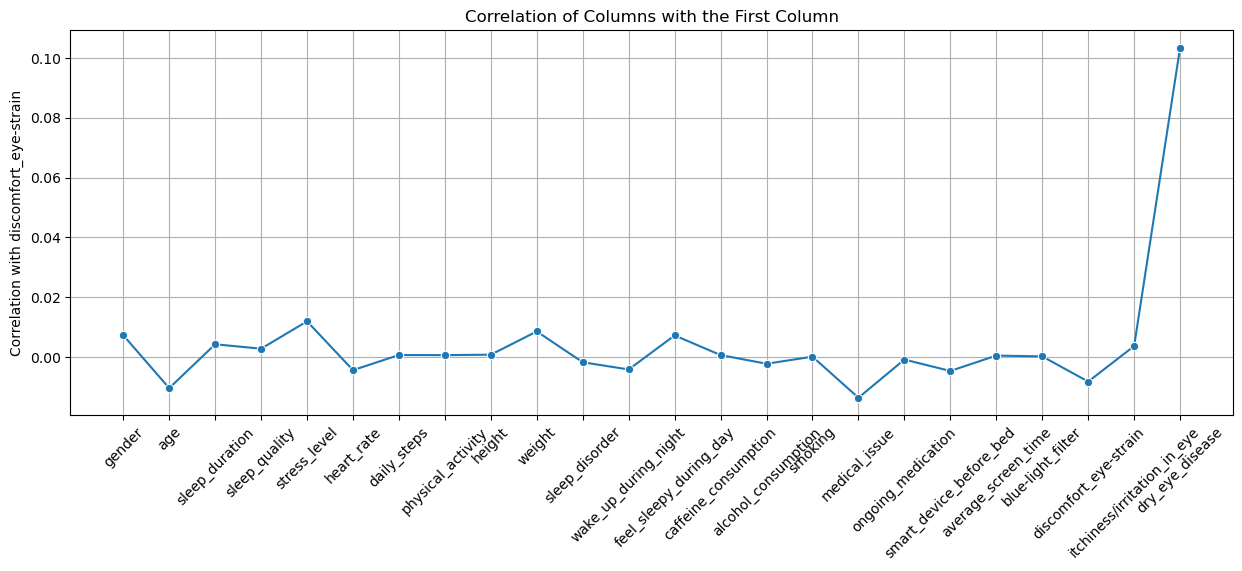

21


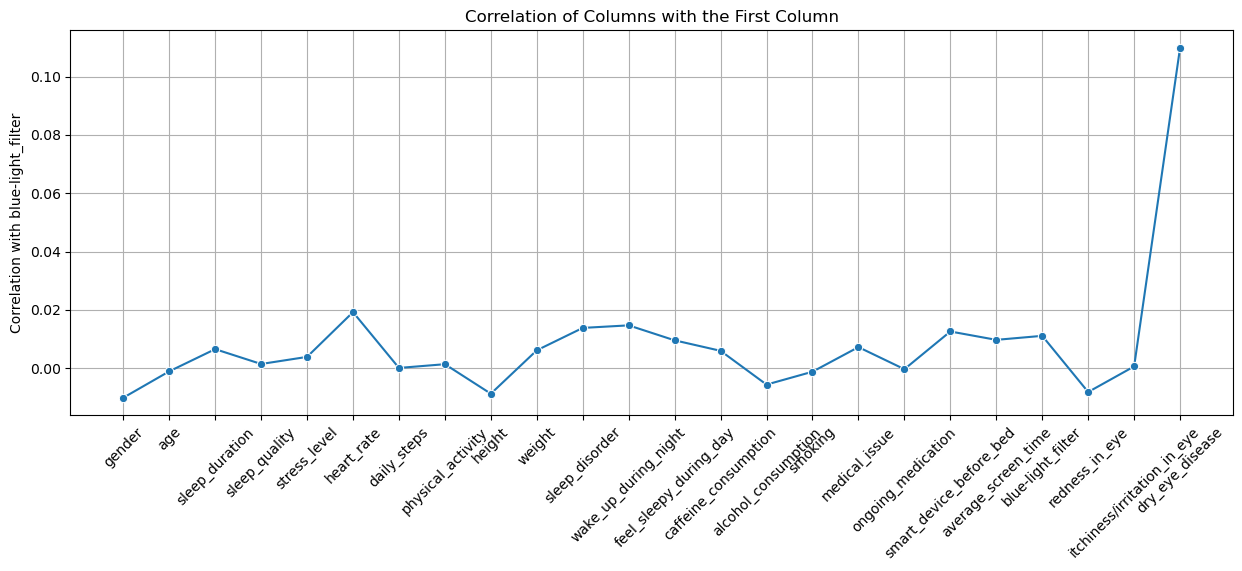

20


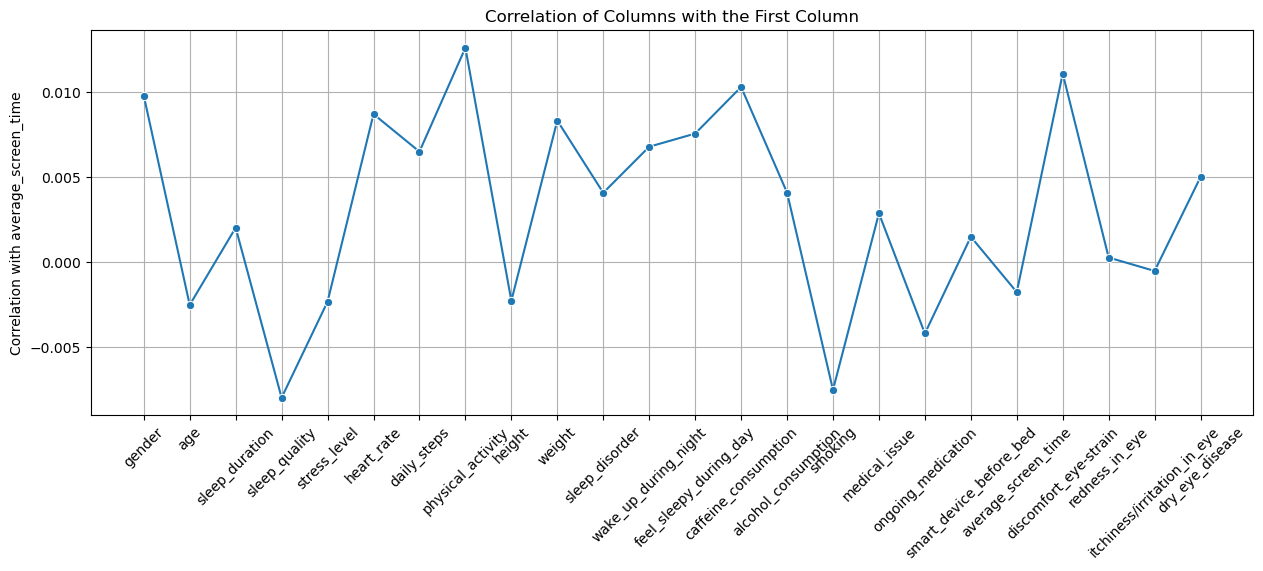

19


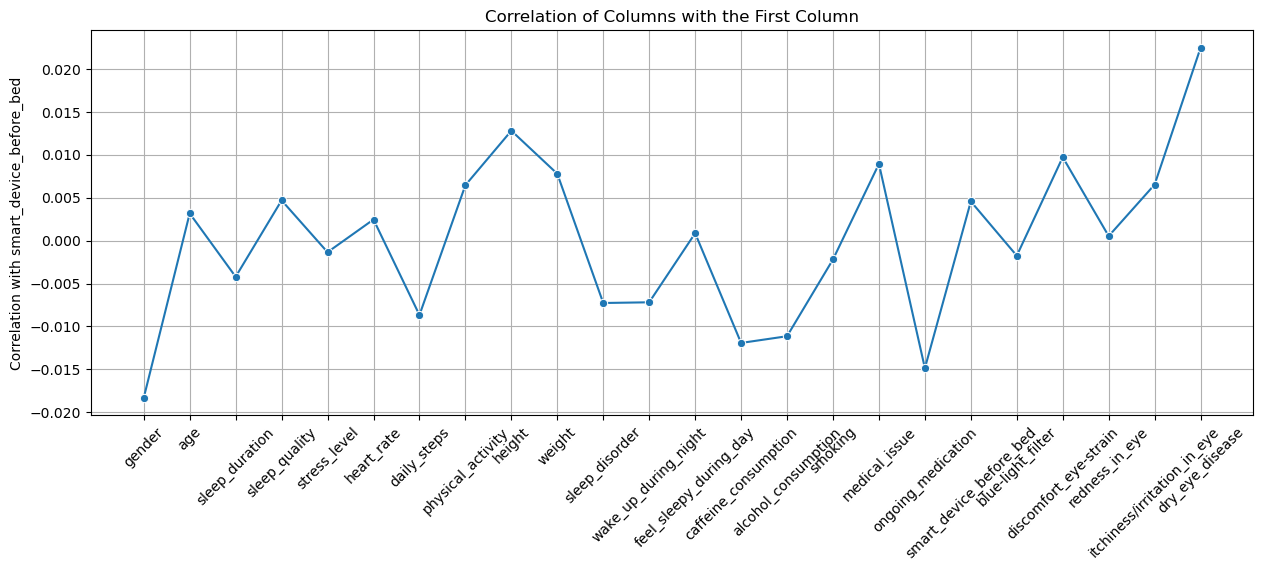

13


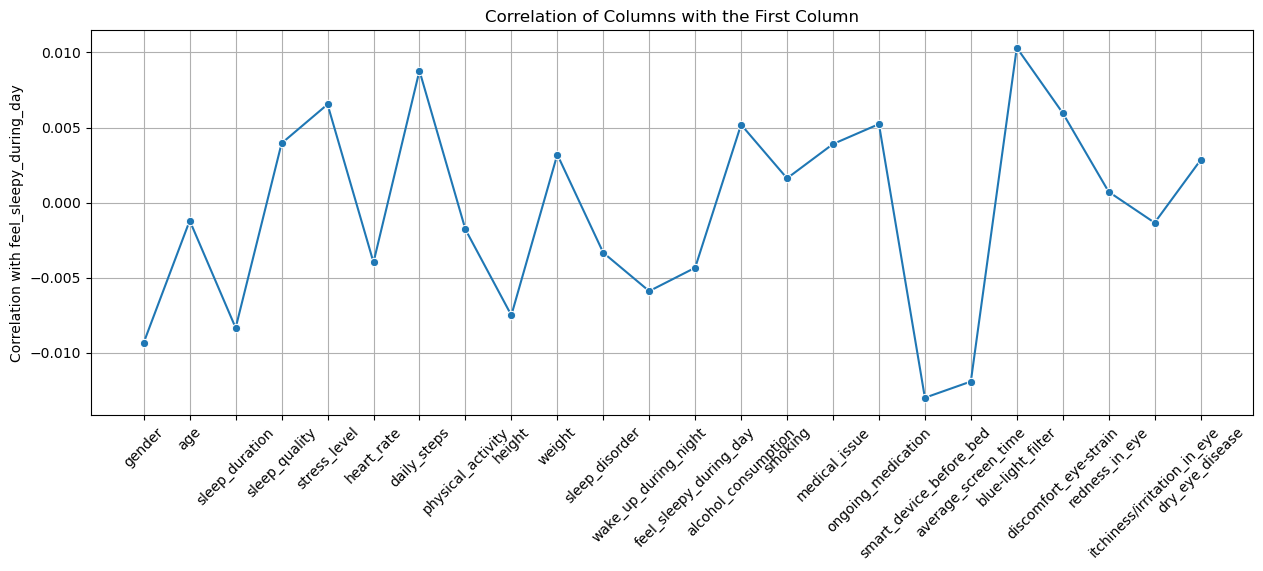

In [83]:
column_label = ['dry_eye_disease', 'itchiness/irritation_in_eye', 'redness_in_eye', 'discomfort_eye-strain', 'blue-light_filter', 'average_screen_time', 'caffeine_consumption']

for cl in column_label:
    i = df.columns.get_loc(cl)-1
    print(i)
    y_values = corr_matrix0.iloc[:, i]  # Correlation with 'i'

    # Remove the first column and corresponding row
    corr_matrix = corr_matrix0.drop(columns=corr_matrix0.columns[i])  # Drop i column
    y_values = y_values.drop(index=y_values.index[i])  # Drop i row

    # Plot
    plt.figure(figsize=(15, 5))
    sns.lineplot(x=corr_matrix.columns, y=y_values, marker="o", linestyle="-")
    plt.xlabel("")
    plt.ylabel(f"Correlation with {df.columns[i]}")  # Label as the first column name
    plt.title("Correlation of Columns with the First Column")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()